In [22]:
import tensorflow as tf
import os
import cv2
import numpy as np
from keras import utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [3]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'0-Normal': 0, '1-Doubtful': 1, '2-Mild': 2, '3-Moderate': 3, '4-Severe': 4}
['0-Normal', '1-Doubtful', '2-Mild', '3-Moderate', '4-Severe']
[0, 1, 2, 3, 4]


In [4]:
img_size=256
data=[]
label=[]
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

In [6]:
new_label=utils.to_categorical(label)

In [7]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers
model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

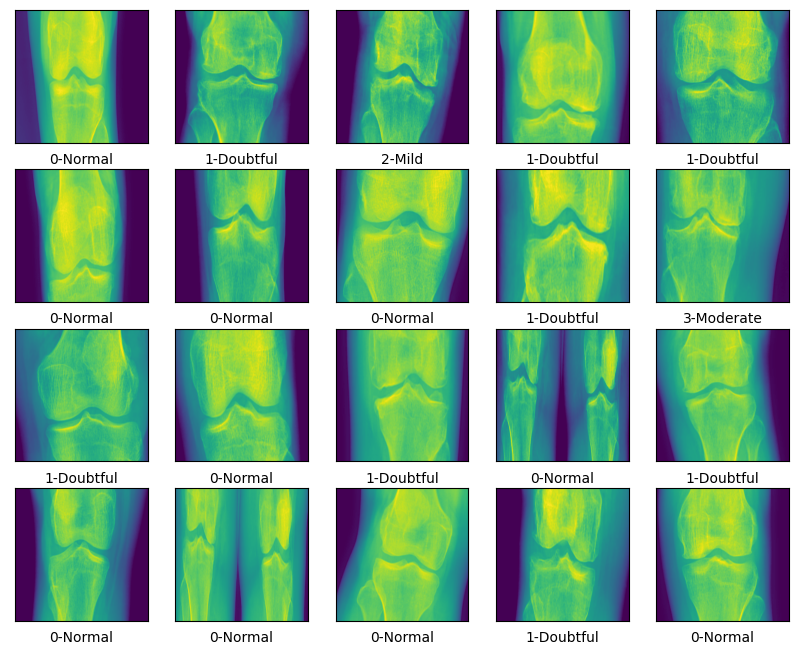

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [13]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
38/38 [==============================] - 286s 7s/step - loss: 1.5315 - accuracy: 0.3089 - val_loss: 1.5461 - val_accuracy: 0.3098
Epoch 2/5
38/38 [==============================] - 239s 6s/step - loss: 1.4992 - accuracy: 0.3291 - val_loss: 1.5409 - val_accuracy: 0.2963
Epoch 3/5
38/38 [==============================] - 231s 6s/step - loss: 1.4731 - accuracy: 0.3384 - val_loss: 1.4670 - val_accuracy: 0.3771
Epoch 4/5
38/38 [==============================] - 233s 6s/step - loss: 1.4490 - accuracy: 0.3645 - val_loss: 1.4650 - val_accuracy: 0.3603
Epoch 5/5
38/38 [==============================] - 235s 6s/step - loss: 1.3940 - accuracy: 0.4049 - val_loss: 1.5080 - val_accuracy: 0.3704


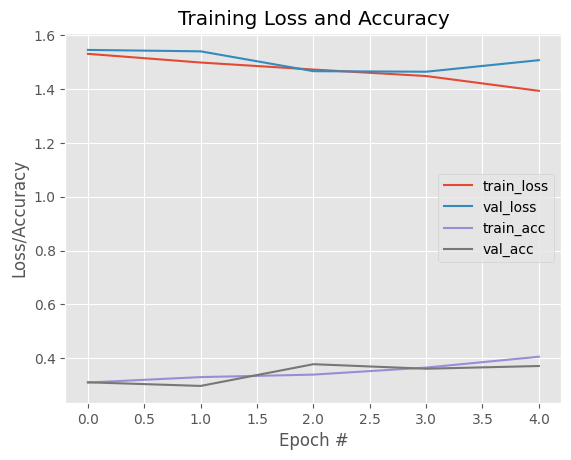

In [14]:
N = 5 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [15]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 1.4076687097549438 %
test accuracy: 0.3333333432674408 %


1/1 [==============================] - 0s 86ms/step
A.I predicts: 1-Doubtful
Correct prediction for label 1 is 1-Doubtful


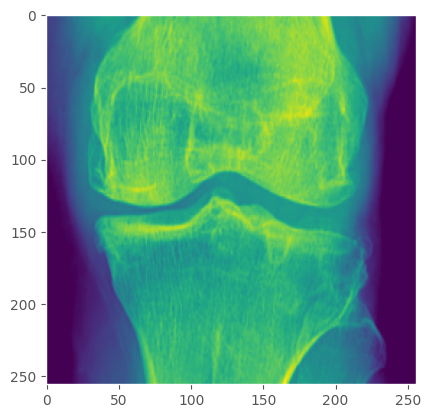

In [21]:
X = 30
img_size = 256
img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)
predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

6/6 [==============================] - 9s 1s/step


<Figure size 640x480 with 0 Axes>

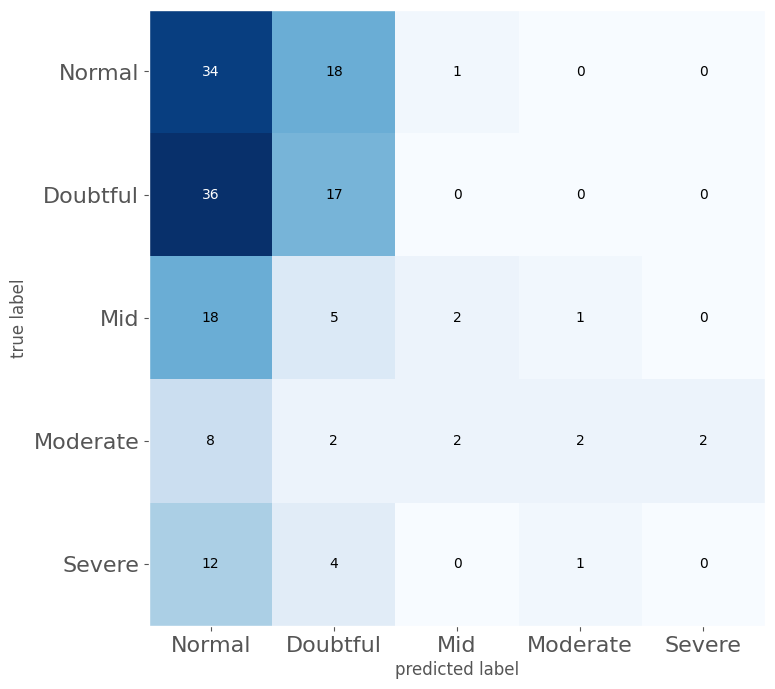

In [23]:
test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)
cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()